In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('/content/AirQualityUCI.csv', sep=';', decimal=',', parse_dates=[['Date', 'Time']], na_values=-200)

# Drop rows and columns with all NaN values
df.dropna(axis=1, how='all', inplace=True)


df.dropna(axis=0, how='any', inplace=True)

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, 2:])

df_scaled = pd.DataFrame(df_scaled, columns=df.columns[2:])


desc_stats = df.describe()
print(desc_stats)

           CO(GT)  PT08.S1(CO)     NMHC(GT)    C6H6(GT)  PT08.S2(NMHC)  \
count  827.000000   827.000000   827.000000  827.000000     827.000000   
mean     2.353567  1207.879081   231.025393   10.771100     966.116082   
std      1.409496   241.816997   208.461912    7.418134     266.424557   
min      0.300000   753.000000     7.000000    0.500000     448.000000   
25%      1.300000  1017.000000    77.000000    4.800000     754.000000   
50%      2.000000  1172.000000   157.000000    9.100000     944.000000   
75%      3.100000  1380.000000   318.500000   14.800000    1142.500000   
max      8.100000  2040.000000  1189.000000   39.200000    1754.000000   

          NOx(GT)  PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  827.000000    827.000000  827.000000    827.000000   827.000000   
mean   143.501814    963.297461  100.259976   1600.620314  1045.812576   
std     81.829717    265.914168   31.493823    302.291793   400.134662   
min     12.000000    461.000000   19.

<ipython-input-8-4021d5d269a1>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/content/AirQualityUCI.csv', sep=';', decimal=',', parse_dates=[['Date', 'Time']], na_values=-200)


<Figure size 2000x1500 with 0 Axes>

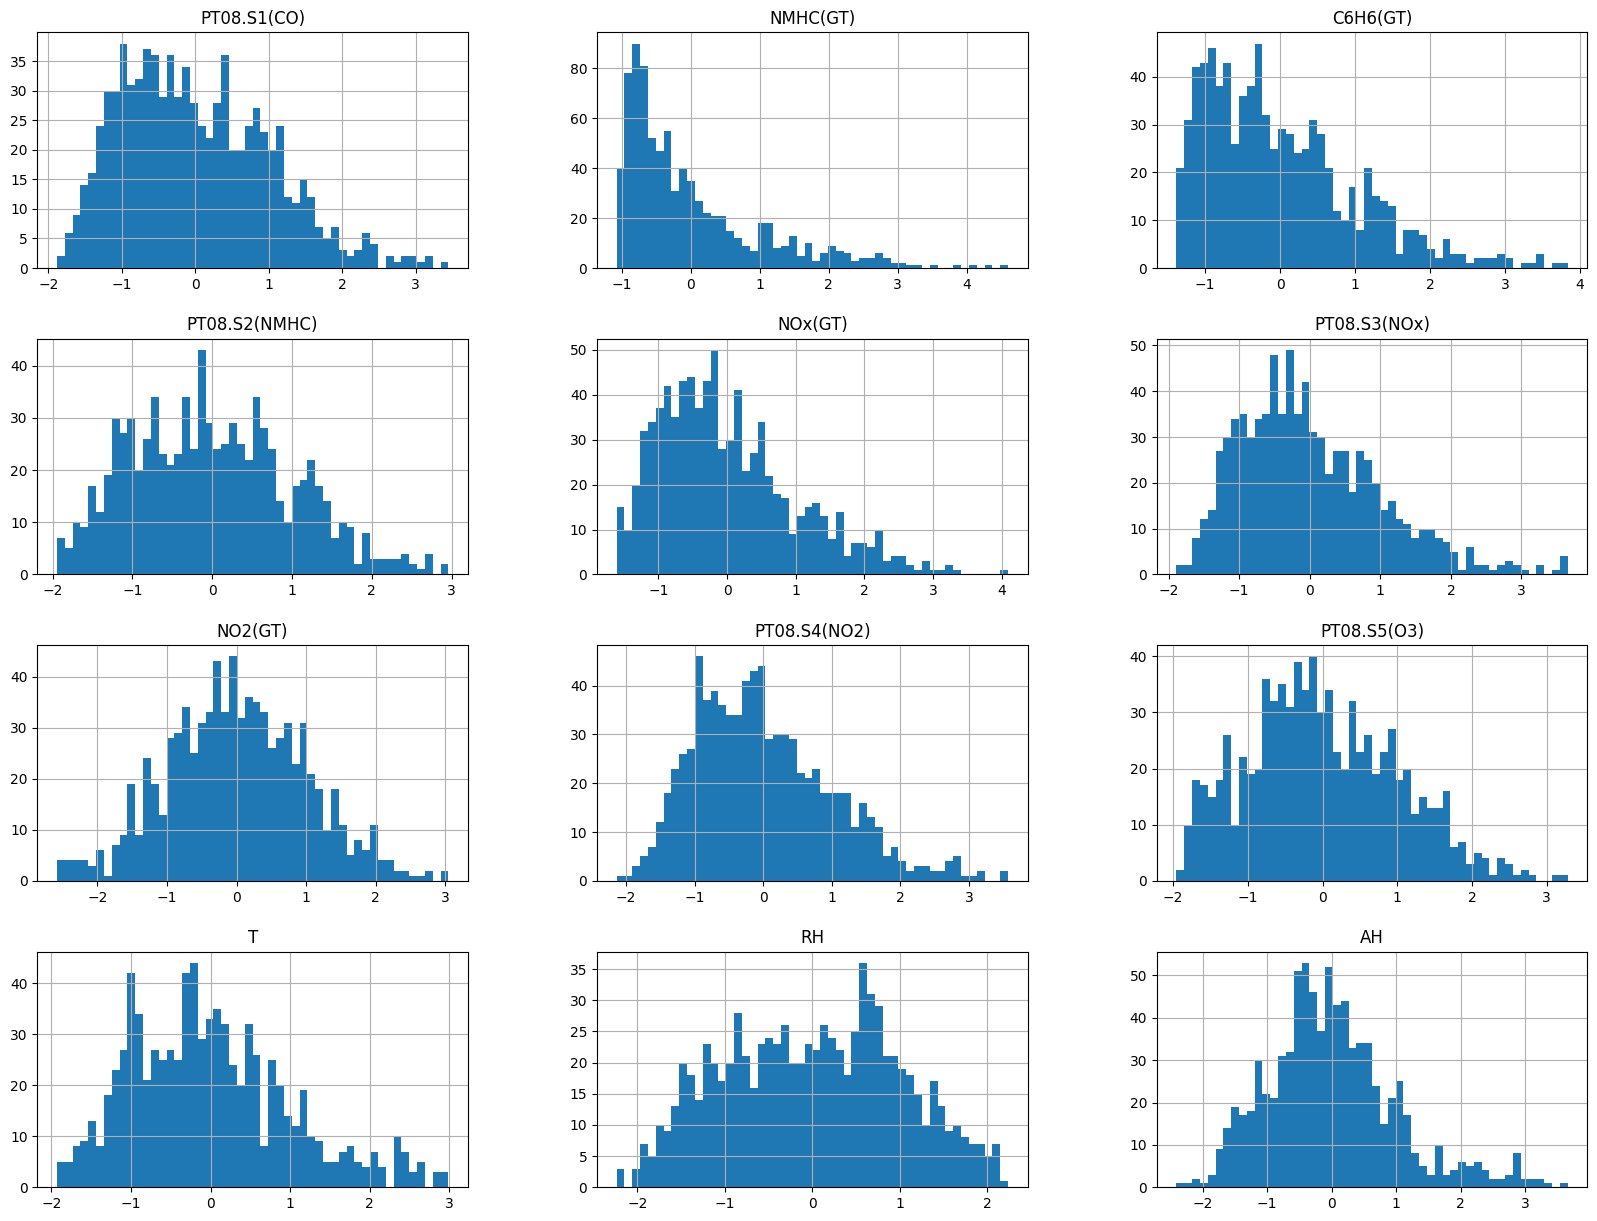

In [9]:
#Distribution of sensor readings
plt.figure(figsize=(20, 15))
df_scaled.hist(bins=50, figsize=(20, 15))
plt.show()

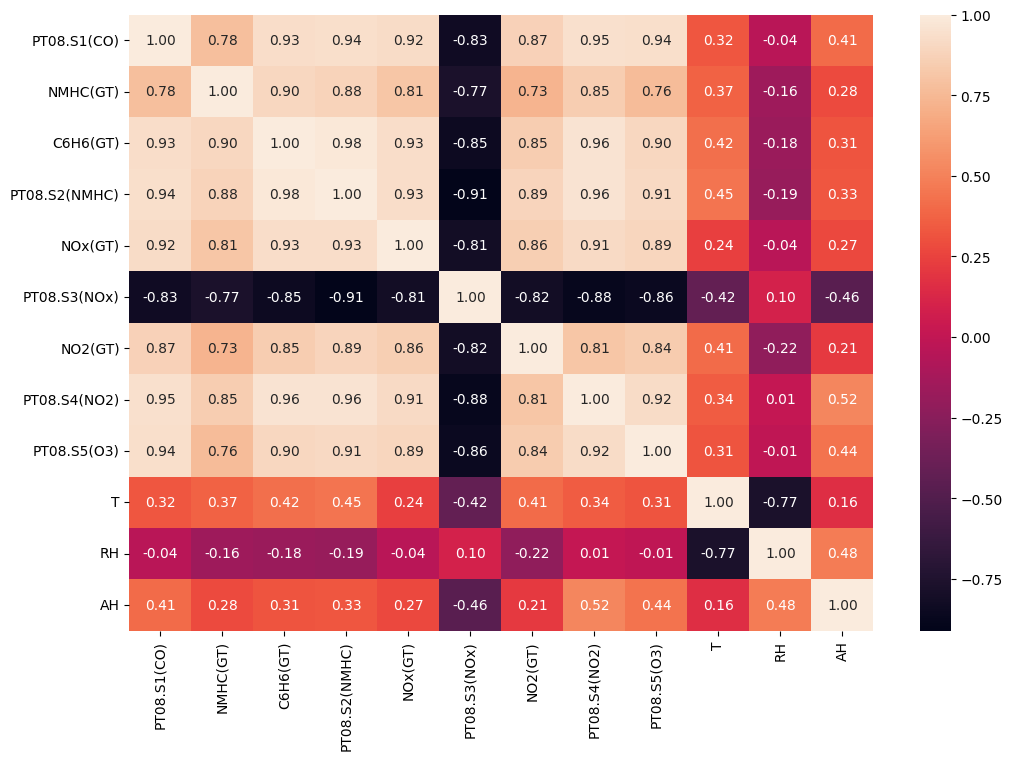

In [10]:
#Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled.corr(), annot=True, fmt=".2f")
plt.show()

In [11]:
#Feature and target separation
X = df_scaled.drop(['NO2(GT)'], axis=1)
y = df_scaled['NO2(GT)']

print(y)


0      0.404769
1     -0.262432
2      0.436541
3      0.690713
4      0.500084
         ...   
822    1.040199
823    0.309455
824    0.055283
825    0.245912
826    0.309455
Name: NO2(GT), Length: 827, dtype: float64


In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
#Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [14]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

#Evaluate model on test data
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error: {mae}')

Epoch 1/50
17/17 [==============================] - 2s 29ms/step - loss: 0.4170 - mae: 0.4869 - val_loss: 0.2235 - val_mae: 0.3638
Epoch 2/50
17/17 [==============================] - 0s 8ms/step - loss: 0.2100 - mae: 0.3631 - val_loss: 0.1724 - val_mae: 0.3263
Epoch 3/50
17/17 [==============================] - 0s 5ms/step - loss: 0.1687 - mae: 0.3263 - val_loss: 0.1559 - val_mae: 0.3099
Epoch 4/50
17/17 [==============================] - 0s 6ms/step - loss: 0.1460 - mae: 0.3013 - val_loss: 0.1486 - val_mae: 0.3090
Epoch 5/50
17/17 [==============================] - 0s 5ms/step - loss: 0.1360 - mae: 0.2925 - val_loss: 0.1391 - val_mae: 0.2998
Epoch 6/50
17/17 [==============================] - 0s 7ms/step - loss: 0.1250 - mae: 0.2792 - val_loss: 0.1330 - val_mae: 0.2918
Epoch 7/50
17/17 [==============================] - 0s 5ms/step - loss: 0.1226 - mae: 0.2754 - val_loss: 0.1420 - val_mae: 0.2990
Epoch 8/50
17/17 [==============================] - 0s 6ms/step - loss: 0.1154 - mae: 0.2

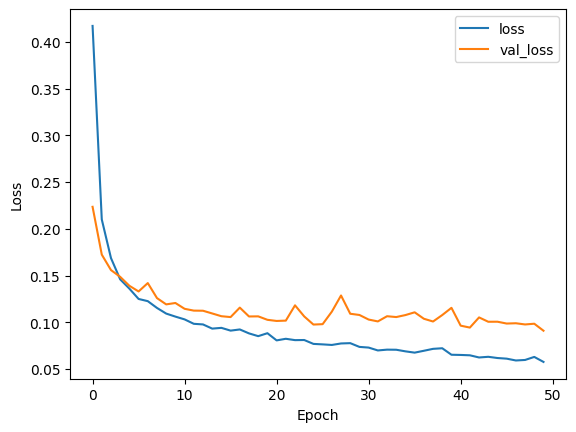

In [16]:
#Plot training history
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
#Predicting on test data
y_pred = model.predict(X_test)

#Calculate additional metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

6/6 [==============================] - 0s 3ms/step
Root Mean Squared Error: 0.31738594726698044
R^2 Score: 0.9076135453709585


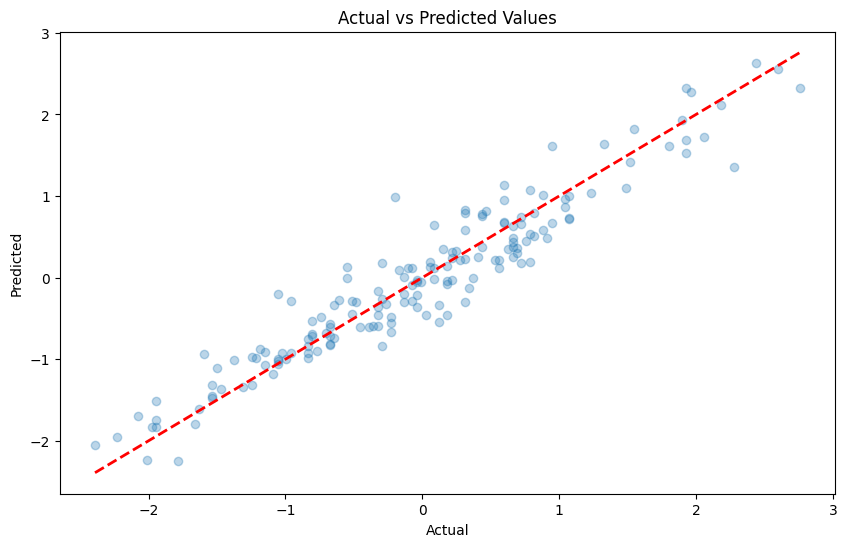

In [17]:
#Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()